In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [2]:
data = pd.read_csv('data/AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [3]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

In [4]:
def plot_trend(forecast1, forecast2, title):
  plt.figure(figsize=(10,10))
  plt.scatter(x=train['Month'], y=train['#Passengers'], label='Train')
  plt.scatter(x=test['Month'], y=test['#Passengers'], label='Test')
  plt.scatter(x=test['Month'], y=forecast1, label='Simple')
  plt.scatter(x=test['Month'], y=forecast2, label='Holt')
  
  plt.title(title)
  plt.grid(True)
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Passenger Volume')
  
  return plt.show()


In [5]:
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

In [18]:
import numpy as np
# Grid Search for Holt's Linear Trend Model
best_alpha, best_beta = 0, 0
best_sse = float('inf')

for alpha in np.arange(0.1, 1.0, 0.1):
    for beta in np.arange(0.1, 1.0, 0.1):
        model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
        forecasts_holt = model_holt.forecast(len(test))
        sse = np.sum((forecasts_holt - test['#Passengers']) ** 2)
        if sse < best_sse:
            best_sse = sse
            best_alpha, best_beta = alpha, beta

# Fit the best Holt's model
model_holt = Holt(train['#Passengers'], damped_trend=True).fit(optimized = True, smoothing_level=best_alpha, smoothing_slope=best_beta)
forecasts_holt = model_holt.forecast(len(test))

C:\Users\shory\AppData\Local\Temp\ipykernel_25660\3594204426.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
C:\Users\shory\AppData\Local\Temp\ipykernel_25660\3594204426.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
C:\Users\shory\AppData\Local\Temp\ipykernel_25660\3594204426.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['#Passengers'], damped_trend=True).fit(smoothing_level=alpha, smoothing_slope=beta)
C:\Users\shory\AppData\Local\Temp\ipykernel_25660\3594204426.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_holt = Holt(train['#Passengers

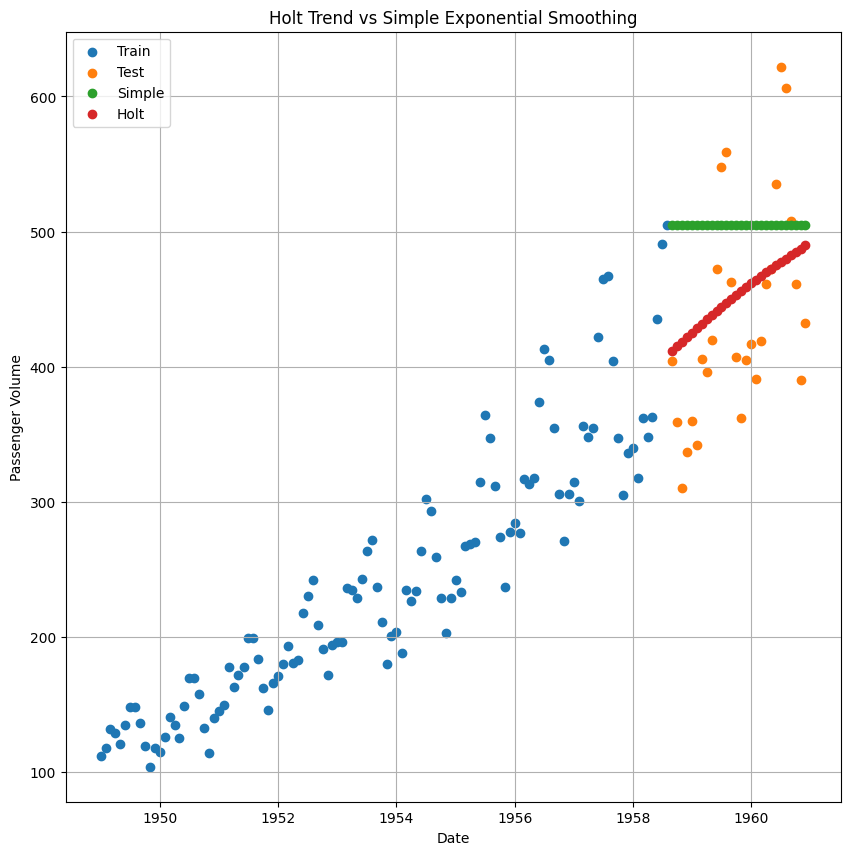

In [19]:
# Plot the forecasts
plot_trend(forecasts_simple, forecasts_holt, "Holt Trend vs Simple Exponential Smoothing")

In [20]:
model_simple.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,SimpleExpSmoothing,SSE,83037.230
Optimized:,True,AIC,766.521
Trend:,None,BIC,772.028
Seasonal:,None,AICC,766.881
Seasonal Periods:,None,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,14:58:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,112.00000,l.0,False


In [21]:
model_holt.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,Holt,SSE,180790.953
Optimized:,True,AIC,862.775
Trend:,Additive,BIC,876.543
Seasonal:,None,AICC,863.812
Seasonal Periods:,None,Date:,"Thu, 04 Jul 2024"
Box-Cox:,False,Time:,14:58:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.1000000,beta,False
